In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
df = pd.read_csv('dataset.csv')
df.head()

,Serial No.,Degree,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,B.Sc,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,B.Sc,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,B.Sc,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,B.Sc,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80
4,5,B.Sc,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN


In [127]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Missing Values:
 Serial No.            0
Degree                1
GRE Score            19
TOEFL Score          13
University Rating    15
SOP                   5
LOR                   8
CGPA                 28
Research             18
Chance of Admit      37
dtype: int64


In [128]:
df['degree_new'] = df['Degree'].map({'B.Sc': 1, 'M.Sc': 0})
print(df['degree_new'].value_counts())

degree_new
1.0    224
0.0    175
Name: count, dtype: int64


In [129]:
df.drop('Degree', axis=1, inplace=True)
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,degree_new
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1.0
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1.0
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1.0
3,4,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80,1.0
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN,1.0
5,6,330.0,115.0,5.0,4.5,NaN,NaN,1.0,0.90,1.0
6,7,321.0,109.0,NaN,NaN,4.0,NaN,1.0,0.75,1.0
7,8,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0.68,1.0
8,9,NaN,102.0,1.0,2.0,NaN,8.00,NaN,0.50,1.0
9,10,323.0,108.0,NaN,3.5,NaN,NaN,0.0,0.45,1.0


In [130]:
print(df.columns.tolist())

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit', 'degree_new']


In [131]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,degree_new
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,NaN,0.80,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,NaN,1.0


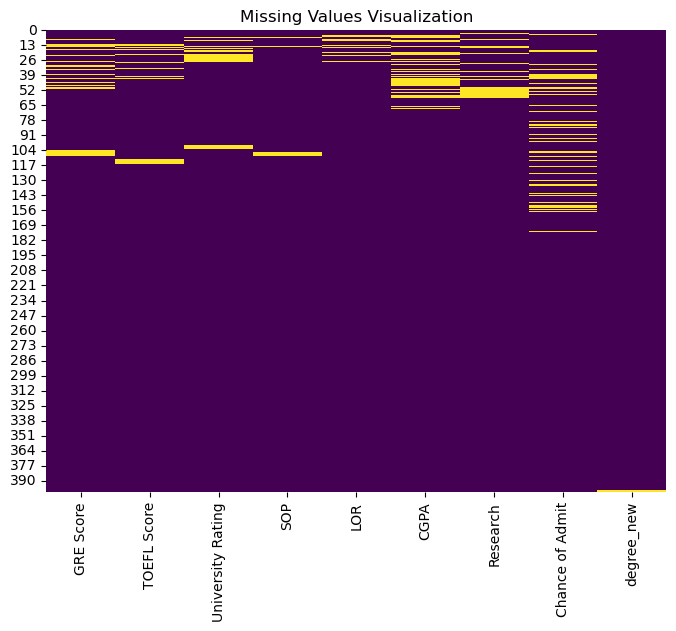

In [132]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

## Describe the Missing Data Pattern

#### In your case, the missing values in the Research and Chance of Admit columns could be:

#### MCAR (Missing Completely at Random): If the missing data is unrelated to the values in the dataset.

#### MAR (Missing at Random): If the missing data is related to some other observed variables.

#### MNAR (Missing Not at Random): If the missing data is related to the values of the variable itself.

#### Let's assume, for this task, we describe them as Missing Completely at Random (MCAR) because they seem random in nature and don’t exhibit any patterns that depend on other variables.

# Forward imputation

In [133]:
# Forward Fill
df_forward_fill = df.copy()
df_forward_fill = df.fillna(method='ffill')
#df_forward_fill.head(15)
df_forward_fill = df_forward_fill.isnull().sum()
print("Missing Values After Forward Fill:\n", df_forward_fill)

Missing Values After Forward Fill:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           0
dtype: int64


C:\Users\Rayhan\AppData\Local\Temp\ipykernel_4596\3906959413.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_forward_fill = df.fillna(method='ffill')


# Backward imputation

In [134]:
# Backward Fill
df_backward_fill = df.copy()
df_backward_fill = df.fillna(method='bfill')
#df_backward_fill.head(15)
df_backward_fill = df_backward_fill.isnull().sum()
print("Missing Values After Forward Fill:\n", df_backward_fill)

Missing Values After Forward Fill:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           1
dtype: int64


C:\Users\Rayhan\AppData\Local\Temp\ipykernel_4596\2851669375.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_backward_fill = df.fillna(method='bfill')


# Mean imputation

In [ ]:
# Mean Imputation (only numerical columns)
df_mean_imputation = df.copy()

df_mean_imputation['GRE Score'] = df_mean_imputation[
    'GRE Score'].fillna(
        df_mean_imputation['GRE Score'].mean())

df_mean_imputation['TOEFL Score'] = df_mean_imputation[
    'TOEFL Score'].fillna(
        df_mean_imputation['TOEFL Score'].mean())

df_mean_imputation['Chance of Admit'] = df_mean_imputation[
    'Chance of Admit'].fillna(
        df_mean_imputation['Chance of Admit'].mean())

df_mean_imputation['University Rating'] = df_mean_imputation[
    'University Rating'].fillna(
        df_mean_imputation['University Rating'].mean())

df_mean_imputation['SOP'] = df_mean_imputation[
    'SOP'].fillna(
        df_mean_imputation['SOP'].mean())

df_mean_imputation['LOR'] = df_mean_imputation[
    'LOR'].fillna(
        df_mean_imputation['LOR'].mean())

df_mean_imputation['CGPA'] = df_mean_imputation[
    'CGPA'].fillna(
        df_mean_imputation['CGPA'].mean())

df_mean_imputation['Research'] = df_mean_imputation[
    'Research'].fillna(
        df_mean_imputation['Research'].mean())

df_mean_imputation['degree_new'] = df_mean_imputation[
    'degree_new'].fillna(
        df_mean_imputation['degree_new'].mean())

print(df_mean_imputation.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           0
dtype: int64


# Median imputation

In [ ]:
# Mean Imputation (only numerical columns)
df_median_imputation = df.copy()

df_median_imputation['GRE Score'] = df_median_imputation[
    'GRE Score'].fillna(
        df_median_imputation['GRE Score'].mean())

df_median_imputation['TOEFL Score'] = df_median_imputation[
    'TOEFL Score'].fillna(
        df_median_imputation['TOEFL Score'].mean())

df_median_imputation['Chance of Admit'] = df_median_imputation[
    'Chance of Admit'].fillna(
        df_median_imputation['Chance of Admit'].mean())

df_median_imputation['University Rating'] = df_median_imputation[
    'University Rating'].fillna(
        df_median_imputation['University Rating'].mean())

df_median_imputation['SOP'] = df_median_imputation[
    'SOP'].fillna(
        df_median_imputation['SOP'].mean())

df_median_imputation['LOR'] = df_median_imputation[
    'LOR'].fillna(
        df_median_imputation['LOR'].mean())

df_median_imputation['CGPA'] = df_median_imputation[
    'CGPA'].fillna(
        df_median_imputation['CGPA'].mean())

df_median_imputation['Research'] = df_median_imputation[
    'Research'].fillna(
        df_median_imputation['Research'].mean())

df_median_imputation['degree_new'] = df_median_imputation[
    'degree_new'].fillna(
        df_median_imputation['degree_new'].mean())

print(df_median_imputation.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
degree_new           0
dtype: int64


In [ ]:
# Compare key statistics before and after imputation
stats_before = df[['GRE Score', 
                   'TOEFL Score', 
                   'University Rating',
                   'SOP',
                   'LOR',
                   'Research', 
                   'CGPA',
                   'degree_new', 
                   'Chance of Admit']].describe()
print("Statistics Before Imputation:\n", stats_before)

Statistics Before Imputation:
         GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  381.000000   387.000000         385.000000  395.000000  392.000000   
mean   316.690289   107.405685           3.070130    3.393671    3.463010   
std     11.486314     6.097504           1.140069    1.008258    0.895018   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

         Research        CGPA  degree_new  Chance of Admit  
count  382.000000  372.000000  399.000000       363.000000  
mean     0.549738    8.603871    0.561404         0.726364  
std      0.498172    0.583594    0.496838         0.138877  
min      0.000000    7.200000  

# forward_fill imputation

In [ ]:
# Compare key statistics before and after imputation
stats_after_forward_fill = df_forward_fill[['GRE Score', 
                                            'TOEFL Score', 
                                            'University Rating',
                                            'SOP','LOR',
                                            'Research', 
                                            'CGPA',
                                            'degree_new', 
                                            'Chance of Admit']].describe()
print("Statistics Before Imputation:\n", stats_after_forward_fill)

Statistics Before Imputation:
 count    9.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64


# backward_fill imputation

In [ ]:
# Compare key statistics before and after imputation
stats_after_backward_fill = df_backward_fill[['GRE Score', 
                                              'TOEFL Score', 
                                              'University Rating',
                                              'SOP',
                                              'LOR',
                                              'Research', 
                                              'CGPA',
                                              'degree_new', 
                                              'Chance of Admit']].describe()
print("Statistics Before Imputation:\n", stats_after_backward_fill)

Statistics Before Imputation:
 count    9.000000
mean     0.111111
std      0.333333
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
dtype: float64


# after_mean_imputation

In [ ]:
# Compare key statistics before and after imputation
stats_after_mean_imputation = df_mean_imputation[['GRE Score', 
                                                  'TOEFL Score', 
                                                  'University Rating',
                                                  'SOP',
                                                  'LOR',
                                                  'Research', 
                                                  'CGPA',
                                                  'degree_new', 
                                                  'Chance of Admit']].describe()
print("Statistics Before Imputation:\n", stats_after_mean_imputation)

Statistics Before Imputation:
         GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.00000   
mean   316.690289   107.405685           3.070130    3.393671    3.46301   
std     11.209495     5.997349           1.118433    1.001921    0.88600   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    309.000000   103.000000           2.000000    2.500000    3.00000   
50%    316.690289   107.000000           3.000000    3.500000    3.50000   
75%    324.000000   111.250000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

         Research        CGPA  degree_new  Chance of Admit  
count  400.000000  400.000000  400.000000       400.000000  
mean     0.549738    8.603871    0.561404         0.726364  
std      0.486806    0.562745    0.496215         0.132281  
min      0.000000    7.200000    0.00000

# after_median_imputation

In [ ]:
# Compare key statistics before and after imputation
stats_after_median_imputation = df_median_imputation[['GRE Score', 
                                                      'TOEFL Score', 
                                                      'University Rating',
                                                      'SOP',
                                                      'LOR',
                                                      'Research', 
                                                      'CGPA',
                                                      'degree_new', 
                                                      'Chance of Admit']].describe()
print("Statistics Before Imputation:\n", stats_after_median_imputation)

Statistics Before Imputation:
         GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.00000   
mean   316.690289   107.405685           3.070130    3.393671    3.46301   
std     11.209495     5.997349           1.118433    1.001921    0.88600   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    309.000000   103.000000           2.000000    2.500000    3.00000   
50%    316.690289   107.000000           3.000000    3.500000    3.50000   
75%    324.000000   111.250000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

         Research        CGPA  degree_new  Chance of Admit  
count  400.000000  400.000000  400.000000       400.000000  
mean     0.549738    8.603871    0.561404         0.726364  
std      0.486806    0.562745    0.496215         0.132281  
min      0.000000    7.200000    0.00000

# KNN imputation

In [ ]:
from sklearn.impute import KNNImputer

# KNN Imputation
imputer = KNNImputer(n_neighbors=2)
df_knn_imputation = df.copy()
df_knn_imputation[['GRE Score', 
                   'TOEFL Score', 
                   'University Rating',
                   'SOP',
                   'LOR',
                   'Research', 
                   'CGPA',
                   'degree_new', 
                   'Chance of Admit'
                   ]] = imputer.fit_transform(df_knn_imputation[[
                       'GRE Score', 
                       'TOEFL Score', 
                       'University Rating',
                       'SOP',
                       'LOR',
                       'Research', 
                       'CGPA',
                       'degree_new', 
                       'Chance of Admit']])

# Display KNN imputed data
print("KNN Imputation:\n", df_knn_imputation)


KNN Imputation:
      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1        324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2        316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3        322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4        314.0        103.0                2.0  2.0  3.0  8.21       0.0   
..         ...          ...                ...  ...  ...   ...       ...   
395      324.0        110.0                3.0  3.5  3.5  9.04       1.0   
396      325.0        107.0                3.0  3.0  3.5  9.11       1.0   
397      330.0        116.0                4.0  5.0  4.5  9.45       1.0   
398      312.0        103.0                3.0  3.5  4.0  8.78       0.0   
399      333.0        117.0                4.0  5.0  4.0  9.66       1.0   

     Chance of Admit  degree_new  
0               0.92         1.0  


# No missing value for KNN Imputation

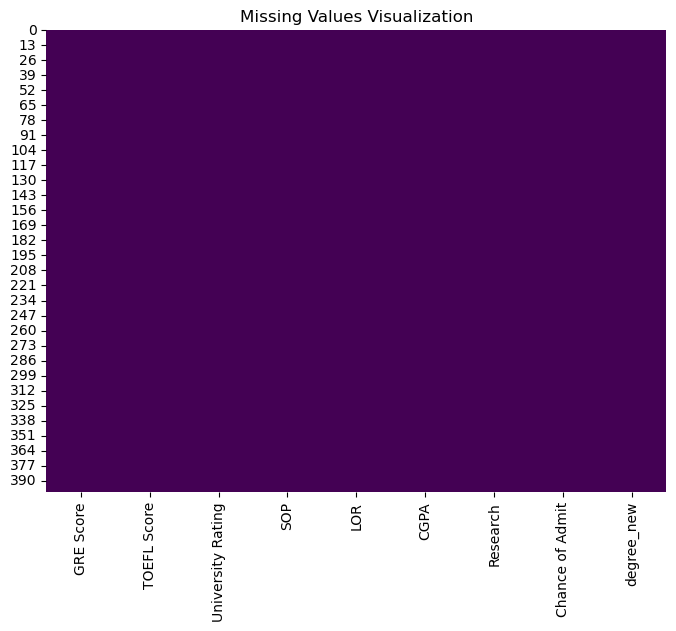

In [143]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_knn_imputation.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

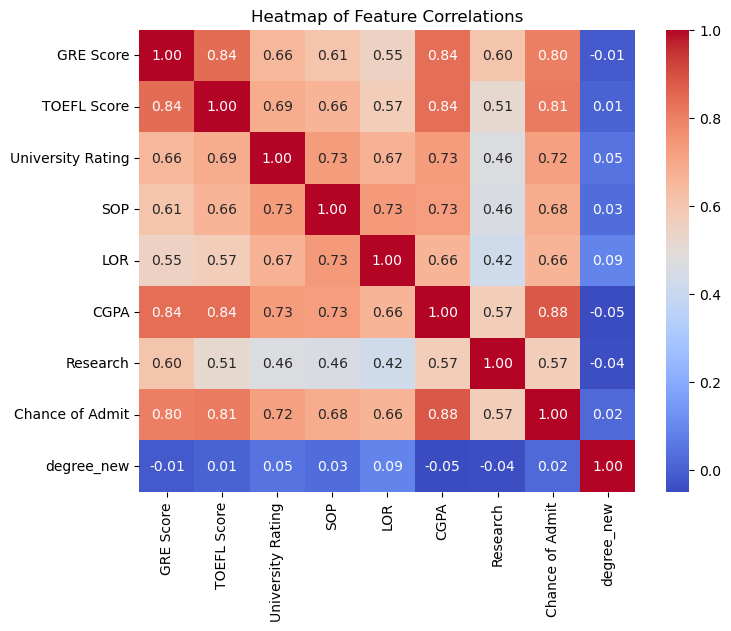

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Train with KNN imputation

In [ ]:
features = [
    col for col in df_knn_imputation.columns if col != 'Chance of Admit']  
X = df_knn_imputation[features]
y = df_knn_imputation['Chance of Admit']
# Display shapes
print("Features data:", X.shape)
print("Target:",y.shape)

Features data: (400, 8)
Target: (400,)


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
print(f"Training data shape (features): {X_train.shape}")
print(f"Testing data shape (features): {X_test.shape}")
print(f"Training data shape (target): {y_train.shape}")
print(f"Testing data shape (target): {y_test.shape}")

Training data shape (features): (320, 8)
Testing data shape (features): (80, 8)
Training data shape (target): (320,)
Testing data shape (target): (80,)


In [148]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [149]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
 print(f"{feature}: {coef:.4f}")
# R² Score
r2 = model.score(X_test, y_test)
print("R-Squared:",r2)

Intercept: -1.1595869436473085
Coefficients:
GRE Score: 0.0015
TOEFL Score: 0.0039
University Rating: 0.0056
SOP: 0.0068
LOR: 0.0125
CGPA: 0.1032
Research: 0.0206
degree_new: 0.0000
R-Squared: 0.7907926627909186


Mean Squared Error: 0.004908375964278291
Root Mean Squared Error: 0.07005980277076357


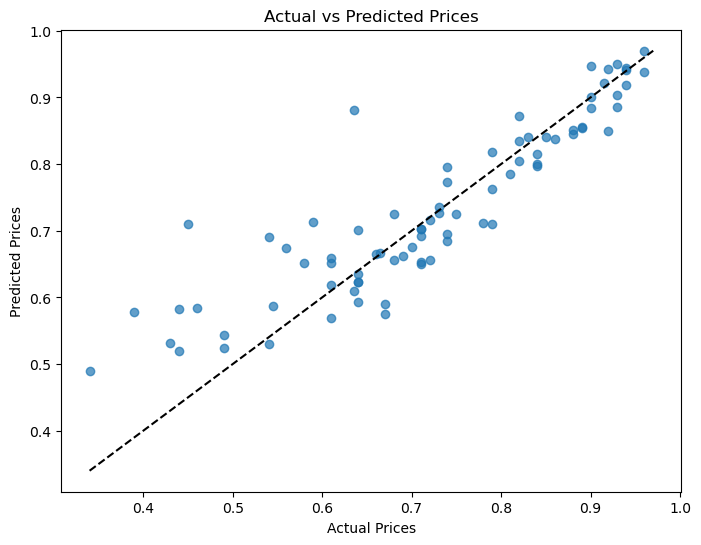

In [150]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()